In [1]:
"""
Created on Wed Apr 29 15:40:32 2020

@author: Pranav Ashok
"""

# Import and check the versions of packages
import sys
print('Python: {}'.format(sys.version))

import scipy
print('scipy: {}'.format(scipy.__version__))

import numpy
print('numpy: {}'.format(numpy.__version__))

import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

import pandas as pd
print('pandas: {}'.format(pd.__version__))

import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import seaborn as sns
print('seaborn: {}'.format(sns.__version__))

import os
from IPython.display import display, HTML

# Import specific libraries for convenient access
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

#Navigate to directory with the country data
originalDir = os.getcwd()
os.chdir(originalDir + '/usa_data/csv')
thisDir = os.getcwd()

Python: 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
scipy: 1.4.1
numpy: 1.16.4
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1
seaborn: 0.10.0


In [2]:
# Function for evaluating different models
#def evalModels(df, numFeatures, testSize):   
    #Split dataset (train & test)
#    array = df.values
#    X = array[:, 0:numFeatures-1]
 #   y = array[:, numFeatures-1]
 #   X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=testSize, random_state=1)
 #   
 #   # Create the list of models
 #   models = []
 #   models.append(('LAS', Lasso(alpha=0.1)))
 #   models.append(('EN', ElasticNet(alpha=0.1)))
 #   models.append(('RID', Ridge(alpha=0.1)))
 #   models.append(('SVR', SVR(kernel='sigmoid')))
 #   
 #   
 #   # Evaluate each model in turn
 #   results = []
 #   names = []
 #   for name, model in models:
 #       kfold = KFold(n_splits=10, random_state=None, shuffle=False)
 #       cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
 #       results.append(cv_results)
 #       names.append(name)
 #       print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

In [3]:
# Function for visualizing data
def visualizeData(df):
    sns.set(style="darkgrid", color_codes=True)
    
    # Histograms
    print("Histogram of COVID-19 Deaths:")
    sns.distplot(df['Total\nDeaths'], kde=False)
    plt.show()    
    
    # Scatter plot matrix  
    print("Scatter Plot Matrix:")
    g = sns.PairGrid(df)
    g.map(plt.scatter)

1) Import data

In [4]:
USdata = pd.read_csv('USA_dataset.csv')
USdf = pd.DataFrame(data=USdata)

#Re-index data
USdf = USdf.set_index(USdf.columns[0])
USdf.index.name = None

display(HTML(USdf.to_html()))

,Total Recovered,"Serious, Critical",Total Cases,Active Cases,Total Tests,Total Deaths Tomorrow
2020-02-29,-0.682920,-0.958691,-0.887700,-0.916308,-0.890192,-0.761280
2020-03-01,-0.682893,-0.958691,-0.887685,-0.916297,-0.890192,-0.761280
2020-03-02,-0.682840,-0.958193,-0.887665,-0.916280,-0.890192,-0.761028
2020-03-03,-0.682840,-0.957696,-0.887596,-0.916215,-0.890192,-0.760877
2020-03-04,-0.682840,-0.957696,-0.887540,-0.916160,-0.890192,-0.760776
2020-03-05,-0.682840,-0.957530,-0.887424,-0.916029,-0.890192,-0.760726
2020-03-06,-0.682840,-0.957530,-0.887242,-0.915816,-0.890192,-0.760575
2020-03-07,-0.682680,-0.957530,-0.886966,-0.915520,-0.890192,-0.760373
2020-03-08,-0.682680,-0.957530,-0.886624,-0.915128,-0.888879,-0.760222
2020-03-09,-0.682680,-0.957530,-0.886322,-0.914780,-0.888506,-0.760020


In [5]:
# Import raw data for data visualization
rawData = pd.read_csv('USA_dataset_raw.csv')
rawDF = pd.DataFrame(data=rawData)

#Re-index data
rawDF = rawDF.set_index(rawDF.columns[0])
rawDF.index.name = None

display(HTML(rawDF.to_html()))

,Total Recovered,"Serious, Critical",Total Cases,Active Cases,Total Tests,Total Deaths
2020-02-29,6.0,1.0,63.0,57.0,0.0,0.0
2020-03-01,7.0,1.0,68.0,60.0,0.0,1.0
2020-03-02,9.0,4.0,75.0,65.0,0.0,1.0
2020-03-03,9.0,7.0,99.0,84.0,0.0,6.0
2020-03-04,9.0,7.0,118.0,100.0,0.0,9.0
2020-03-05,9.0,8.0,158.0,138.0,0.0,11.0
2020-03-06,9.0,8.0,221.0,200.0,0.0,12.0
2020-03-07,15.0,8.0,316.0,286.0,0.0,15.0
2020-03-08,15.0,8.0,434.0,400.0,2390.0,19.0
2020-03-09,15.0,8.0,538.0,501.0,3069.0,22.0


2) Visualize data trends and gain insight into correlation

Histogram of COVID-19 Deaths:


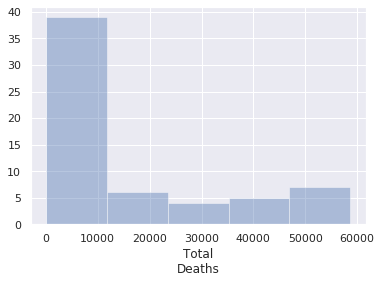

Scatter Plot Matrix:


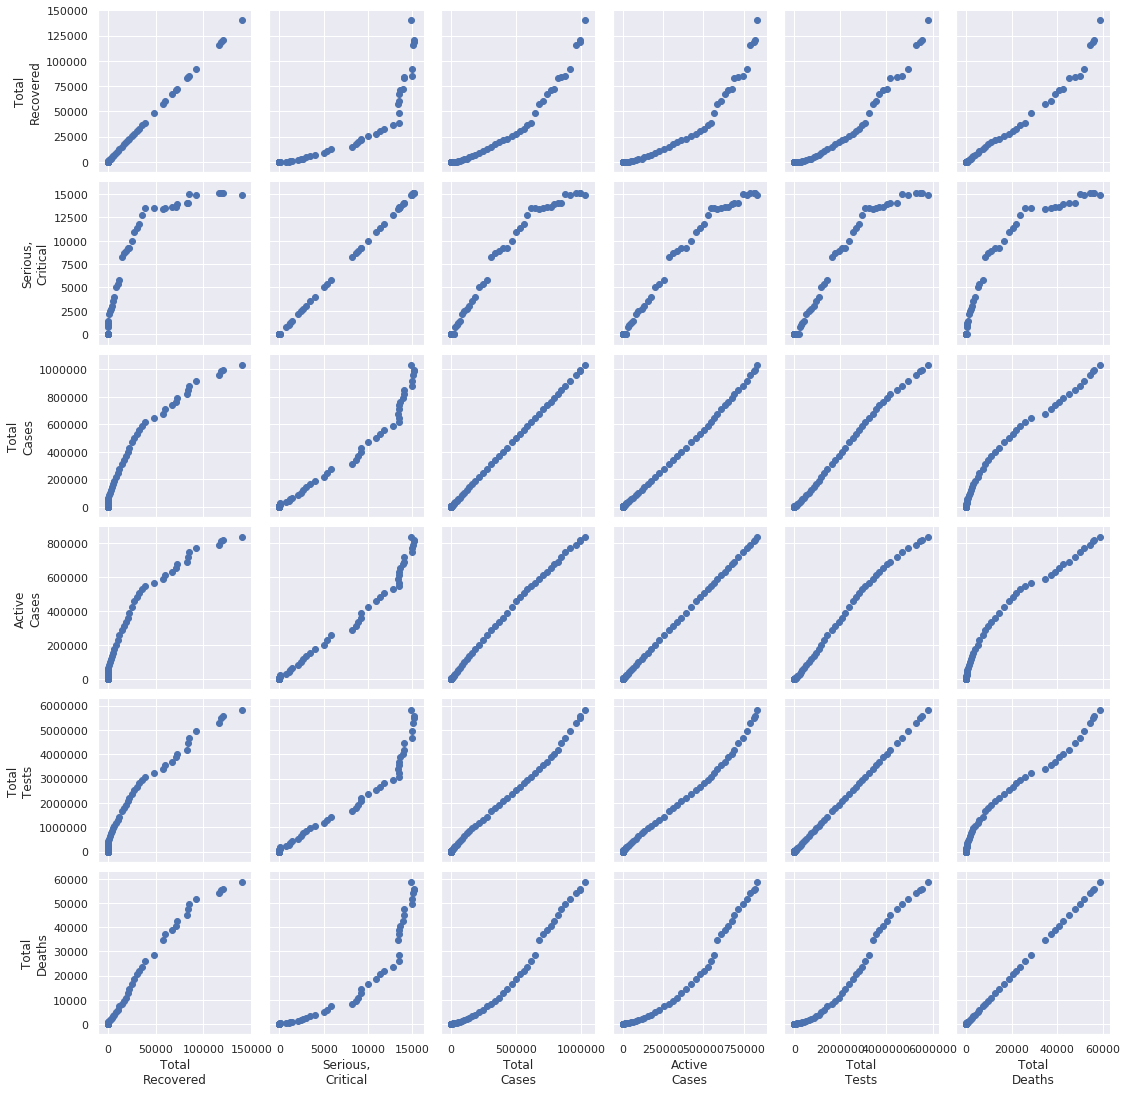

In [6]:
visualizeData(rawDF)

3) Train and test dataset on various models with different success measurements

In [7]:
#Split dataset (80% for training & 20% for testing)
array = USdf.values
X = array[:, 0:5]
y = array[:, 5]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2)
    
# Create the list of models
models = []
models.append(('LAS', Lasso(alpha=0.03)))
models.append(('EN', ElasticNet(alpha=0.03)))
models.append(('RID', Ridge(alpha=0.03)))
models.append(('SVR', SVR(kernel='linear')))
    
# Create the list of success measures
accuracy = []
accuracy.append(('Mean Absolute Error', 'neg_mean_absolute_error'))
accuracy.append(('Mean Squared Error', 'neg_mean_squared_error'))
accuracy.append(('Coefficient of Determination (r^2)', 'r2'))
accuracy.append(('Explained Variance Score', 'explained_variance'))
    
# Evaluate each model in turn with various success measurements
results = []
names = []
params = []
for scoreName, score in accuracy:
    print(scoreName + '\n')
    minimum = 100.0
    maximum = -100.0
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=None, shuffle=False)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
        results.append(cv_results)
        names.append(name)
        if(abs(cv_results.mean())<minimum):
            lowest = name
            minimum = abs(cv_results.mean())
        if(cv_results.mean()>maximum):
            highest = name
            maximum=cv_results.mean()
        params.append(model.get_params())
        print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    if(score=='neg_mean_absolute_error' or score=='neg_mean_squared_error'):
        print('\nBest Model: ' + lowest + '\n\n')
    else:
        print('\nBest Model: ' + highest + '\n\n')

print(params)

Mean Absolute Error

LAS: -0.088470 (0.035675)
EN: -0.095138 (0.030697)
RID: -0.063442 (0.026224)
SVR: -0.100357 (0.018236)

Best Model: RID


Mean Squared Error

LAS: -0.014735 (0.010489)
EN: -0.014982 (0.009652)
RID: -0.008557 (0.008377)
SVR: -0.013133 (0.007296)

Best Model: RID


Coefficient of Determination (r^2)

LAS: 0.969315 (0.045923)
EN: 0.964977 (0.057249)
RID: 0.989020 (0.008502)
SVR: 0.961874 (0.072422)

Best Model: RID


Explained Variance Score

LAS: 0.973777 (0.043759)
EN: 0.968766 (0.057842)
RID: 0.991712 (0.006491)
SVR: 0.971509 (0.054375)

Best Model: RID


[{'alpha': 0.03, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}, {'alpha': 0.03, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol':